# Linear Algebra, image compression using svd

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

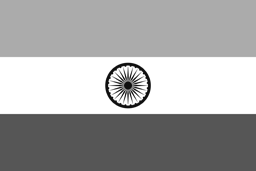

dimensions = (171, 256)
integers to store = 43776


In [4]:
img = cv2.imread('flag.png', 0)
cv2_imshow(img)
print('dimensions =' ,img.shape)
print('integers to store =', img.shape[0] * img.shape[1])

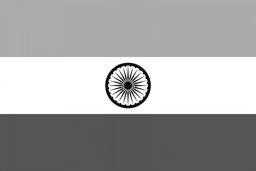

In [17]:
# not compressed using svd
u, d, vt = np.linalg.svd(img)
dd = np.hstack((np.diag(d), np.zeros((171, 256-171))))
cimg = u @ dd @ vt
cv2_imshow(cimg)

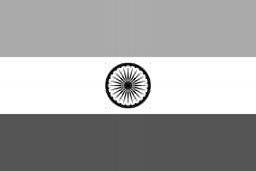

In [45]:
# compressed using svd
u, d, vt = np.linalg.svd(img)
component = 10
d[component:] = 0
dd = np.diag(d)[:component, :component]
uu = u[:, :component]
vvt = vt[:component, :]
cimg = uu @ dd @ vvt
cv2_imshow(cimg)

In [46]:
# compression ratio
original = img.shape[0] * img.shape[1]
compressed = uu.shape[0] * uu.shape[1] + vvt.shape[0] * vvt.shape[1] + component
print(original, compressed, original/compressed)

43776 4280 10.22803738317757


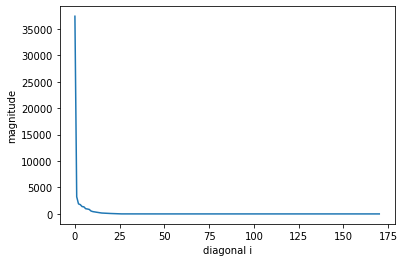

In [39]:
# Plot drop of d
u, d, vt = np.linalg.svd(img)
index = [i for i in range(len(d))]
plt.plot(index, d)
plt.xlabel('diagonal i')
plt.ylabel('magnitude')
plt.show()

In [42]:
# information preserved
print(sum(d[:10]) / sum(d))

0.9514078716468192
